In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [132]:
database = pd.read_csv('database.csv')
database.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,329,normal,7.265076,6.490719,5.837105,7.861153,2.958316,6.915526,5.164356,5.191775,...,11.512426,10.687612,13.186275,12.790031,3.798619,3.165678,2.758158,2.494656,3.092373,2.830248
1,330,normal,7.294932,6.455398,5.497091,7.693888,3.048464,6.997462,5.118763,5.323904,...,11.382575,10.496178,13.163114,12.677342,3.971772,3.420614,2.831661,2.472950,3.034824,2.924207
2,331,normal,8.101461,6.606037,5.809597,7.566532,2.915527,6.695817,5.084102,4.924389,...,11.564506,10.643955,13.181717,12.782085,4.223112,3.303236,2.782225,2.522477,3.144511,2.715381
3,332,normal,8.149318,6.181394,5.523731,7.585691,3.085838,7.096813,5.163067,4.877522,...,11.731514,10.644385,13.266748,12.822743,4.291681,3.811840,3.138734,2.691352,3.159991,2.980692
4,333,normal,7.761231,6.392766,6.036852,7.624368,2.851356,6.795762,4.953513,4.973692,...,11.692599,11.254999,13.397345,12.944275,3.716410,3.307700,2.662943,2.534129,2.967716,3.029605


In [133]:
database.shape

(91, 54677)

In [134]:
# split the data into train and test
database = database.drop('samples', axis=1)
X = database.drop('type', axis=1)
y = database['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# KNN - k-nearest neighbors

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [137]:
predictions = knn_classifier.predict(X_test)
predictions

array(['HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC',
       'HCC', 'normal', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC',
       'HCC', 'HCC', 'HCC', 'HCC', 'normal', 'normal', 'HCC', 'HCC',
       'HCC', 'HCC'], dtype=object)

In [138]:
y_test

57       HCC
61       HCC
26       HCC
29       HCC
43       HCC
56       HCC
35       HCC
44       HCC
22       HCC
75       HCC
5     normal
32       HCC
11       HCC
65       HCC
28       HCC
73       HCC
36       HCC
69       HCC
78       HCC
77       HCC
20       HCC
23       HCC
6     normal
3     normal
40       HCC
12       HCC
25       HCC
37       HCC
Name: type, dtype: object

In [139]:
from sklearn.metrics import accuracy_score, classification_report

In [140]:
accuracy_score(y_test, predictions)

1.0

/home/jonathan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1.0

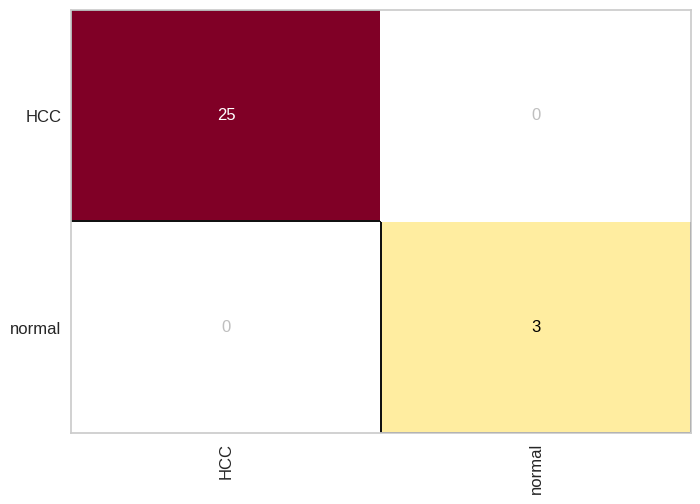

In [141]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_classifier)
cm.fit(X_train, y_train) 
cm.score(X_test, y_test)

In [142]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         HCC       1.00      1.00      1.00        25
      normal       1.00      1.00      1.00         3

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

